# COVID-19 Analysis

This Jupyter Notebook is for exploring trends in collected data for the ongoing COVID-19 pandemic.

We will be using datasets for all 50 states and nationally from 'covidtracking.com', which has collected daily statistics since January 22, 2020. These datasets can be found at:
https://covidtracking.com/data/download/all-states-history.csv and https://covidtracking.com/data/download/national-history.csv.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_STATES = pd.read_csv("https://covidtracking.com/data/download/all-states-history.csv");
df_NATIONWIDE = pd.read_csv("https://covidtracking.com/data/download/national-history.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Open US National Dataset and Display 1st 5 rows
df_NATIONWIDE.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,20200828,173754.0,1023,17304.0,7558.0,1595,37239.0,367588.0,69680696,725710,1856.0,2086.0,75564749,5884053,46546,2118367.0,56,75564749,772256
1,20200827,172731.0,1129,17181.0,7717.0,1668,37464.0,365993.0,68954986,698076,1831.0,2125.0,74792493,5837507,43984,2101326.0,56,74792493,742060
2,20200826,171602.0,1298,17046.0,7763.0,1873,38411.0,364325.0,68256910,631672,1809.0,2142.0,74050433,5793523,43356,2084465.0,56,74050433,675028
3,20200825,170304.0,1147,16920.0,7851.0,1999,38762.0,362452.0,67625238,597782,1789.0,2163.0,73375405,5750167,36374,2053699.0,56,73375405,634156
4,20200824,169157.0,343,16787.0,7836.0,1049,38657.0,360453.0,67027456,648010,1764.0,2118.0,72741249,5713793,34641,2020774.0,56,72741249,682651


In [4]:
# Open States Dataset and Display 1st 5 rows
df_STATES.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,20200828,WY,B,37.0,NaN,0,NaN,215.0,215.0,15.0,...,75236.0,704,NaN,NaN,NaN,NaN,74669.0,693,105845.0,1107
1,20200828,NE,A,391.0,NaN,5,NaN,1968.0,1968.0,174.0,...,352419.0,3844,NaN,NaN,NaN,NaN,352922.0,3867,NaN,0
2,20200828,ND,A,118.0,114.0,0,4.0,550.0,550.0,70.0,...,197996.0,1437,8329.0,NaN,NaN,NaN,197996.0,1437,457750.0,7885
3,20200828,NC,A+,2652.0,2652.0,22,NaN,NaN,NaN,970.0,...,2182891.0,30166,NaN,NaN,NaN,NaN,NaN,0,2182891.0,30166
4,20200828,MT,C,100.0,NaN,2,NaN,417.0,417.0,121.0,...,242875.0,2216,NaN,NaN,NaN,NaN,NaN,0,242875.0,2216


## Data Cleaning

First, let us get an understanding of the characteristics of these datasets. We'll start with the US National dataset.

In [5]:
# Characteristics of the US National Dataset
df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
date                        220 non-null int64
death                       201 non-null float64
deathIncrease               220 non-null int64
inIcuCumulative             157 non-null float64
inIcuCurrently              156 non-null float64
hospitalizedIncrease        220 non-null int64
hospitalizedCurrently       165 non-null float64
hospitalizedCumulative      178 non-null float64
negative                    220 non-null int64
negativeIncrease            220 non-null int64
onVentilatorCumulative      150 non-null float64
onVentilatorCurrently       157 non-null float64
posNeg                      220 non-null int64
positive                    220 non-null int64
positiveIncrease            220 non-null int64
recovered                   157 non-null float64
states                      220 non-null int64
totalTestResults            220 non-null int64
totalTestResultsIncrease    220 n

Given that some of these features have 'NULL' values, let's take a closer look.

In [6]:
# Find 'NULL' values in US National Dataset
df_NATIONWIDE.isnull().sum()

date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
posNeg                       0
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64

Since there are so few 'NULL' values, it is reasonable to assume these are actually '0' values. Hence, we should modify them accordingly.

In [7]:
# Convert 'NULL' values to 0 in US National Dataset
df_NATIONWIDE['death'].fillna(0, inplace = True)
df_NATIONWIDE['inIcuCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['inIcuCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['hospitalizedCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['hospitalizedCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['onVentilatorCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['onVentilatorCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['recovered'].fillna(0, inplace = True)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
date                        220 non-null int64
death                       220 non-null float64
deathIncrease               220 non-null int64
inIcuCumulative             220 non-null float64
inIcuCurrently              220 non-null float64
hospitalizedIncrease        220 non-null int64
hospitalizedCurrently       220 non-null float64
hospitalizedCumulative      220 non-null float64
negative                    220 non-null int64
negativeIncrease            220 non-null int64
onVentilatorCumulative      220 non-null float64
onVentilatorCurrently       220 non-null float64
posNeg                      220 non-null int64
positive                    220 non-null int64
positiveIncrease            220 non-null int64
recovered                   220 non-null float64
states                      220 non-null int64
totalTestResults            220 non-null int64
totalTestResultsIncrease    220 n

While we no longer have 'NULL' values, many of the values have non-numeric values (i.e. 'NONE'). Let's convert those to 0 as well.

In [8]:
# Replace all non-numeric values with 0.
df_NATIONWIDE['death'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['inIcuCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['inIcuCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['hospitalizedCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['hospitalizedCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['onVentilatorCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['onVentilatorCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['recovered'].replace("NONE", 0, inplace=True)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
date                        220 non-null int64
death                       220 non-null float64
deathIncrease               220 non-null int64
inIcuCumulative             220 non-null float64
inIcuCurrently              220 non-null float64
hospitalizedIncrease        220 non-null int64
hospitalizedCurrently       220 non-null float64
hospitalizedCumulative      220 non-null float64
negative                    220 non-null int64
negativeIncrease            220 non-null int64
onVentilatorCumulative      220 non-null float64
onVentilatorCurrently       220 non-null float64
posNeg                      220 non-null int64
positive                    220 non-null int64
positiveIncrease            220 non-null int64
recovered                   220 non-null float64
states                      220 non-null int64
totalTestResults            220 non-null int64
totalTestResultsIncrease    220 n

We still have two data types: integers and float-32 bits. Let's convert all the data into either integer-64bit or floating-64bit.

In [9]:
# Convert Integers to Floats
df_NATIONWIDE['death'].astype(int)
df_NATIONWIDE['inIcuCumulative'].astype(int)
df_NATIONWIDE['inIcuCurrently'].astype(int)
df_NATIONWIDE['hospitalizedCurrently'].astype(int)
df_NATIONWIDE['hospitalizedCumulative'].astype(int)
df_NATIONWIDE['onVentilatorCumulative'].astype(int)
df_NATIONWIDE['onVentilatorCurrently'].astype(int)
df_NATIONWIDE['recovered'].astype(int)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
date                        220 non-null int64
death                       220 non-null float64
deathIncrease               220 non-null int64
inIcuCumulative             220 non-null float64
inIcuCurrently              220 non-null float64
hospitalizedIncrease        220 non-null int64
hospitalizedCurrently       220 non-null float64
hospitalizedCumulative      220 non-null float64
negative                    220 non-null int64
negativeIncrease            220 non-null int64
onVentilatorCumulative      220 non-null float64
onVentilatorCurrently       220 non-null float64
posNeg                      220 non-null int64
positive                    220 non-null int64
positiveIncrease            220 non-null int64
recovered                   220 non-null float64
states                      220 non-null int64
totalTestResults            220 non-null int64
totalTestResultsIncrease    220 n

Let's make sure we have no NA/NaN values.

In [10]:
#Remove any NA/NaN values
df_NATIONWIDE = df_NATIONWIDE[df_NATIONWIDE.notna()]
df_NATIONWIDE.tail()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
215,20200126,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
216,20200125,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
217,20200124,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
218,20200123,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
219,20200122,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0


As a final step, let's create an index for the dates.

In [11]:
# Create an alternate index for the dates (since the data starts with the most recent values)
df_NATIONWIDE = df_NATIONWIDE[::-1].reset_index();

Now that we have the US National Dataset cleaned, let's repeat the process for the individual states.

In [12]:
# Characteristics of the States' Dataset
df_STATES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 42 columns):
date                                9897 non-null int64
state                               9897 non-null object
dataQualityGrade                    8772 non-null object
death                               9205 non-null float64
deathConfirmed                      3638 non-null float64
deathIncrease                       9897 non-null int64
deathProbable                       2512 non-null float64
hospitalized                        5481 non-null float64
hospitalizedCumulative              5481 non-null float64
hospitalizedCurrently               7207 non-null float64
hospitalizedIncrease                9897 non-null int64
inIcuCumulative                     1521 non-null float64
inIcuCurrently                      3877 non-null float64
negative                            9717 non-null float64
negativeIncrease                    9897 non-null int64
negativeTestsAntibody            

Given that some of these features have 'NULL' values, again let's take a closer look.

In [13]:
# Find 'NULL' values in States' Dataset
df_STATES.isnull().sum()

date                                   0
state                                  0
dataQualityGrade                    1125
death                                692
deathConfirmed                      6259
deathIncrease                          0
deathProbable                       7385
hospitalized                        4416
hospitalizedCumulative              4416
hospitalizedCurrently               2690
hospitalizedIncrease                   0
inIcuCumulative                     8376
inIcuCurrently                      6020
negative                             180
negativeIncrease                       0
negativeTestsAntibody               9186
negativeTestsPeopleAntibody         9560
negativeTestsViral                  8433
onVentilatorCumulative              9359
onVentilatorCurrently               6564
positive                              39
positiveCasesViral                  3010
positiveIncrease                       0
positiveScore                          0
positiveTestsAnt

Similarly as before, let us convert all the 'NULL' and non-numeric values to 0.

In [14]:
# Convert 'NULL' values to '0' in States' Dataset
df_STATES['dataQualityGrade'].fillna(0, inplace = True)
df_STATES['death'].fillna(0, inplace = True)
df_STATES['deathConfirmed'].fillna(0, inplace = True)
df_STATES['deathProbable'].fillna(0, inplace = True)
df_STATES['hospitalized'].fillna(0, inplace = True)
df_STATES['hospitalizedCumulative'].fillna(0, inplace = True)
df_STATES['hospitalizedCurrently'].fillna(0, inplace = True)
df_STATES['inIcuCumulative'].fillna(0, inplace = True)
df_STATES['inIcuCurrently'].fillna(0, inplace = True)
df_STATES['negative'].fillna(0, inplace = True)
df_STATES['negativeTestsAntibody'].fillna(0, inplace = True)
df_STATES['negativeTestsPeopleAntibody'].fillna(0, inplace = True)
df_STATES['negativeTestsViral'].fillna(0, inplace = True)
df_STATES['onVentilatorCumulative'].fillna(0, inplace = True)
df_STATES['onVentilatorCurrently'].fillna(0, inplace = True)
df_STATES['positive'].fillna(0, inplace = True)
df_STATES['positiveCasesViral'].fillna(0, inplace = True)
df_STATES['positiveTestsAntibody'].fillna(0, inplace = True)
df_STATES['positiveTestsAntigen'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleAntibody'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleAntigen'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleViral'].fillna(0, inplace = True)
df_STATES['totalTestsViral'].fillna(0, inplace = True)

df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9892,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9893,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9894,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9895,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9896,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0


Let's drop all the NA/NaN values for the states dataset as well.

In [15]:
# Remove all the NA/NaN Values
df_STATES = df_STATES[df_STATES.notna()]
df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9892,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9893,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9894,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9895,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9896,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0


At this juncture, let's select the columns we believe we will need going forward.

In [16]:
# Feature Selection for States' Dataset
df_STATES = df_STATES[['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed', 'deathIncrease', 'deathProbable', 'hospitalized', 'hospitalizedCumulative', 
               'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative', 'negativeIncrease', 'negativeTestsAntibody', 
               'onVentilatorCumulative', 'onVentilatorCurrently', 'positiveCasesViral', 'positive', 'positiveIncrease', 'positiveTestsAntibody', 'positiveTestsAntigen', 
               'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen', 'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease', 'totalTestsViral', 'totalTestsViralIncrease']]

df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,positive,positiveIncrease,positiveTestsAntibody,positiveTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9892,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9893,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9894,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9895,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9896,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


We have two object columns remaining: 'state' and 'dataQualityGrade'. Let's ensure we data for all 50 states and 6 territories/districts.

In [17]:
# Find the unique identifiers in the 'state' column and display them
df_STATESValues = df_STATES['state']
df_STATESValues.nunique()

56

We see we have 56 unique ID's in the array, so the 'state' column is accurate. Let's explore the 'dataQualityGrade' column.

In [18]:
# Find the unique identifiers in the 'dataQualityGrade' column from the States' dataset and display them
df_STATESDataQualityGrade = df_STATES['dataQualityGrade']
df_STATESDataQualityGrade.nunique()

7

We see that we have 7 unique identifiers. Let's see how many are valued at 0.

In [19]:
# Find number of rows that have no 'dataQualityGrade' in the States' dataset
df_STATES.groupby('dataQualityGrade').size()

dataQualityGrade
0     1125
A     2904
A+    2029
B     2615
C      855
D      339
F       30
dtype: int64

This result is very interesting. Out of the 9841 total rows, approximately 15.2% of the data either has no Quality grade or is less than a 'C' Quality. Let's convert the 'dataQualityGrade' column into separate columns for each of the grades. That change will allow use to conduct more analysis later.

In [20]:
# Drop all rows with values of '0', 'F' and 'D' from the States' dataset.

# Convert data Quality Grades into separate columns representing 'A', 'A+', 'B', 'C', 'D', 'F'
df_STATES[['A', 'A+', 'B', 'C', 'D', 'F', '0']] = pd.get_dummies(df_STATES['dataQualityGrade'])
df_STATES.drop(['dataQualityGrade'], axis=1, inplace=True)

df_STATES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 35 columns):
date                             9897 non-null int64
state                            9897 non-null object
death                            9897 non-null float64
deathConfirmed                   9897 non-null float64
deathIncrease                    9897 non-null int64
deathProbable                    9897 non-null float64
hospitalized                     9897 non-null float64
hospitalizedCumulative           9897 non-null float64
hospitalizedCurrently            9897 non-null float64
hospitalizedIncrease             9897 non-null int64
inIcuCumulative                  9897 non-null float64
inIcuCurrently                   9897 non-null float64
negative                         9897 non-null float64
negativeIncrease                 9897 non-null int64
negativeTestsAntibody            9897 non-null float64
onVentilatorCumulative           9897 non-null float64
onVentilatorCurrently 

Lastly, let's perform a similar operation by reverse indexing the values for the states dataset.

In [21]:
# Create an alternate index for the dates (since the data starts with the most recent values)
df_STATES = df_STATES[::-1].reset_index();

df_STATES.tail()

,index,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,A,A+,B,C,D,F,0
9892,4,20200828,MT,100.0,0.0,2,0.0,417.0,417.0,121.0,...,0,242875.0,2216,0,0,0,0,1,0,0
9893,3,20200828,NC,2652.0,2652.0,22,0.0,0.0,0.0,970.0,...,0,2182891.0,30166,0,0,1,0,0,0,0
9894,2,20200828,ND,118.0,114.0,0,4.0,550.0,550.0,70.0,...,1437,457750.0,7885,0,1,0,0,0,0,0
9895,1,20200828,NE,391.0,0.0,5,0.0,1968.0,1968.0,174.0,...,3867,0.0,0,0,1,0,0,0,0,0
9896,0,20200828,WY,37.0,0.0,0,0.0,215.0,215.0,15.0,...,693,105845.0,1107,0,0,0,1,0,0,0


It appears at this juncture the data is sufficiently clean that we can begin analyzing it.

## Exploratory Data Analysis

As an initial part of our analysis, let's plot the recorded COVID-19 deaths as a function of the date using the US National dataset.

Text(0.5, 1.0, 'US Cumulative COVID-19 Deaths')

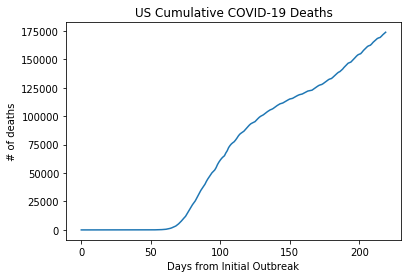

In [22]:
# Plot confirmed deaths as a function of date nationally

# Create the variables
df_NWDeathsConfirmed = df_NATIONWIDE[['death']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship
plt.plot(df_NWDate, df_NWDeathsConfirmed);
plt.xlabel('Days from Initial Outbreak')
plt.ylabel('# of deaths')
plt.title('US Cumulative COVID-19 Deaths')

Now that we know we have useable data, as confirmed by the graph above, let's do some exploring. Let's see if there is any correlation between the data quality and numbers of deaths and hospitalizations.

Text(0.5, 1.0, 'Data Quality - Death/Hospitalization Correlation Heatmap for COVID-19')

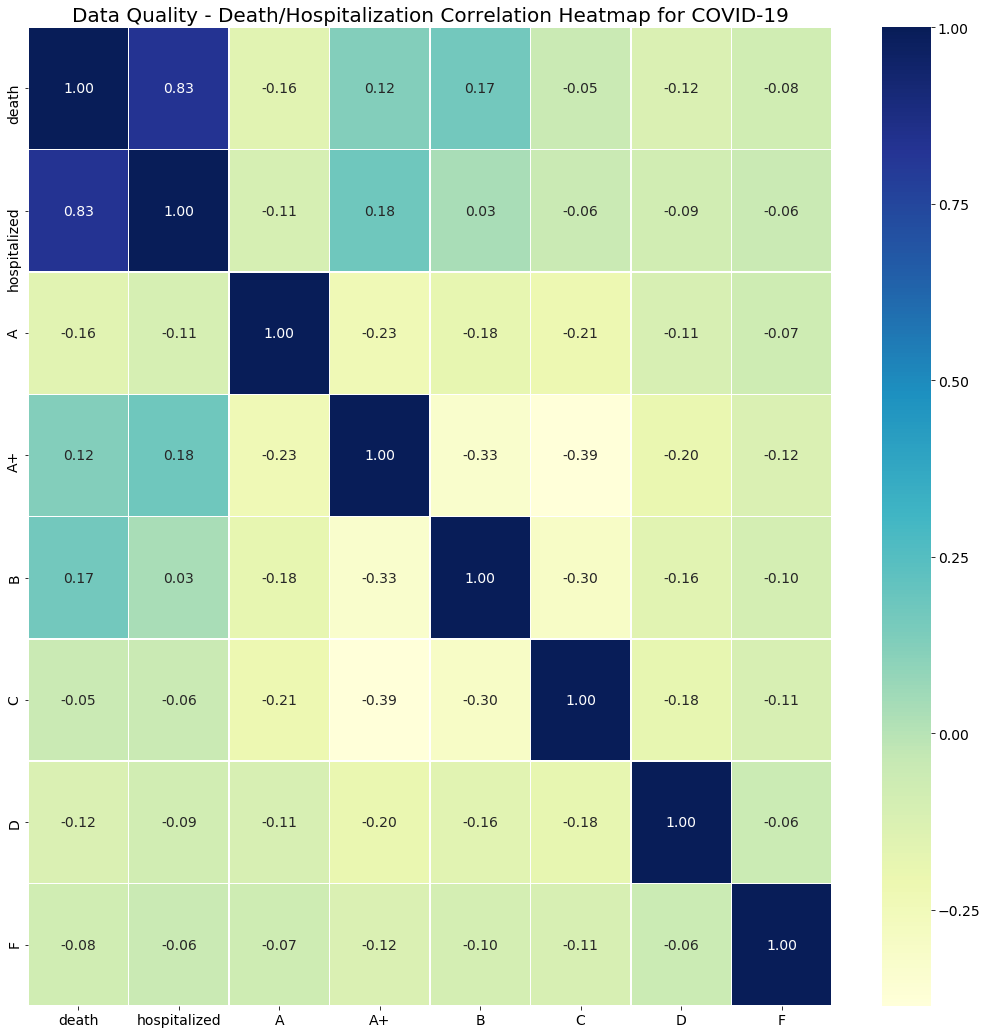

In [96]:
# Data Quality - Death/Hospitalization Matrix
# Select the features to do the analysis
df_ST_fs1 = df_STATES[['death', 'hospitalized', 'A', 'A+', 'B', 'C', 'D', 'F']]

# Create the Data Quality - Death/Hospitalization Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_ST_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Data Quality - Death/Hospitalization Correlation Heatmap for COVID-19', fontsize = 20)

This plot is very interesting. It appears that when the data quality is high (i.e. A+ or B), there is a greater likelihood of a death or hospitalization. Low data quality scores (i.e. C, D, F) show no correlation. While these observations make intuitive sense, they appear to suggest unreliable COVID-19 vital statistics in those cases. What is bizarre is the apparent lack of correlation between 'A' level data quality and deaths/hospitalizations. One possible explanation is that the 'A' level may have been gathered early in the pandemic before it could be vicariously confirmed as reliable. 

As a next level investigation, let us find the most recent data available for each state and assess the data quality for each. 

In [24]:
# Look at the latest set of death totals for each state and territory
df_STATES_latest = df_STATES.drop_duplicates(subset=['state'], keep='last')
df_STATES_latest;

# Sort the cumulative death data by largest to smallest
df_STATES_latest.sort_values(by=['death'])

,index,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,A,A+,B,C,D,F,0
9846,50,20200828,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,1,0,0
9890,6,20200828,MP,2.0,2.0,0,0.0,4.0,4.0,0.0,...,0,17626.0,0,0,0,0,0,0,1,0
9864,32,20200828,GU,10.0,0.0,0,0.0,0.0,0.0,36.0,...,570,36916.0,570,0,1,0,0,0,0,0
9853,43,20200828,VI,14.0,14.0,0,0.0,0.0,0.0,0.0,...,0,15469.0,200,0,0,0,0,1,0,0
9841,55,20200828,AK,37.0,37.0,0,0.0,0.0,0.0,37.0,...,0,339538.0,3318,0,1,0,0,0,0,0
9896,0,20200828,WY,37.0,0.0,0,0.0,215.0,215.0,15.0,...,693,105845.0,1107,0,0,0,1,0,0,0
9866,30,20200828,HI,55.0,0.0,4,0.0,462.0,462.0,286.0,...,2478,247017.0,3863,0,0,0,0,1,0,0
9851,45,20200828,VT,58.0,58.0,0,0.0,0.0,0.0,11.0,...,1924,0.0,0,0,0,0,1,0,0,0
9892,4,20200828,MT,100.0,0.0,2,0.0,417.0,417.0,121.0,...,0,242875.0,2216,0,0,0,0,1,0,0
9894,2,20200828,ND,118.0,114.0,0,4.0,550.0,550.0,70.0,...,1437,457750.0,7885,0,1,0,0,0,0,0


Now let's evaluate the data quality for the most recent set of COVID-19 by the states.

In [25]:
# Assess the data quality for the most recent dataset
df_STATES_latest[['A', 'A+', 'B', 'C', 'D', 'F', '0']].astype(bool).sum(axis=0)

A      0
A+    17
B     23
C     10
D      5
F      1
0      0
dtype: int64

So out of 56 states and territories, we have 16 that have, according to our earlier heatmap, negligible correlation between their data quality and hospitalizations/deaths. Those jurisdictions are the following:

In [26]:
# Import Libraries for printing Time
import datetime
now = datetime.datetime.now();

# Find jurisdictions with data quality = C
df_STATES_latest_C = df_STATES_latest[df_STATES_latest['C'] > 0]
print('Jurisdictions with data quality = C as of today -- ' + (str(now)) + ' --  are:')
print(df_STATES_latest_C.state);
print('\n')

# Find jurisdictions with data quality = D
df_STATES_latest_D = df_STATES_latest[df_STATES_latest['D'] > 0]
print('Jurisdictions with data quality = D as of today -- ' + (str(now)) + ' --  are:')
print(df_STATES_latest_D.state);
print('\n')

# Find jurisdictions with data quality = F
df_STATES_latest_F = df_STATES_latest[df_STATES_latest['F'] > 0]
print('Jurisdictions with data quality = F as of today -- ' + (str(now)) + ' --  are:')
print(df_STATES_latest_F.state);
print('\n')

Jurisdictions with data quality = C as of today -- 2020-08-29 03:08:45.875740 --  are:
9842    AL
9849    WA
9850    CA
9851    VT
9854    CT
9869    PR
9878    KY
9883    NM
9891    NH
9896    WY
Name: state, dtype: object


Jurisdictions with data quality = D as of today -- 2020-08-29 03:08:45.875740 --  are:
9845    WV
9846    AS
9853    VI
9866    HI
9892    MT
Name: state, dtype: object


Jurisdictions with data quality = F as of today -- 2020-08-29 03:08:45.875740 --  are:
9890    MP
Name: state, dtype: object




Let's return to the US National dataset, and see if we can determine any other trends. A good place to begin would be plotting some of the other variables.

In [30]:
df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 20 columns):
index                       220 non-null int64
date                        220 non-null int64
death                       220 non-null float64
deathIncrease               220 non-null int64
inIcuCumulative             220 non-null float64
inIcuCurrently              220 non-null float64
hospitalizedIncrease        220 non-null int64
hospitalizedCurrently       220 non-null float64
hospitalizedCumulative      220 non-null float64
negative                    220 non-null int64
negativeIncrease            220 non-null int64
onVentilatorCumulative      220 non-null float64
onVentilatorCurrently       220 non-null float64
posNeg                      220 non-null int64
positive                    220 non-null int64
positiveIncrease            220 non-null int64
recovered                   220 non-null float64
states                      220 non-null int64
totalTestResults            220 n

Let's compare the number of deaths to the number of recoveries thusfar.

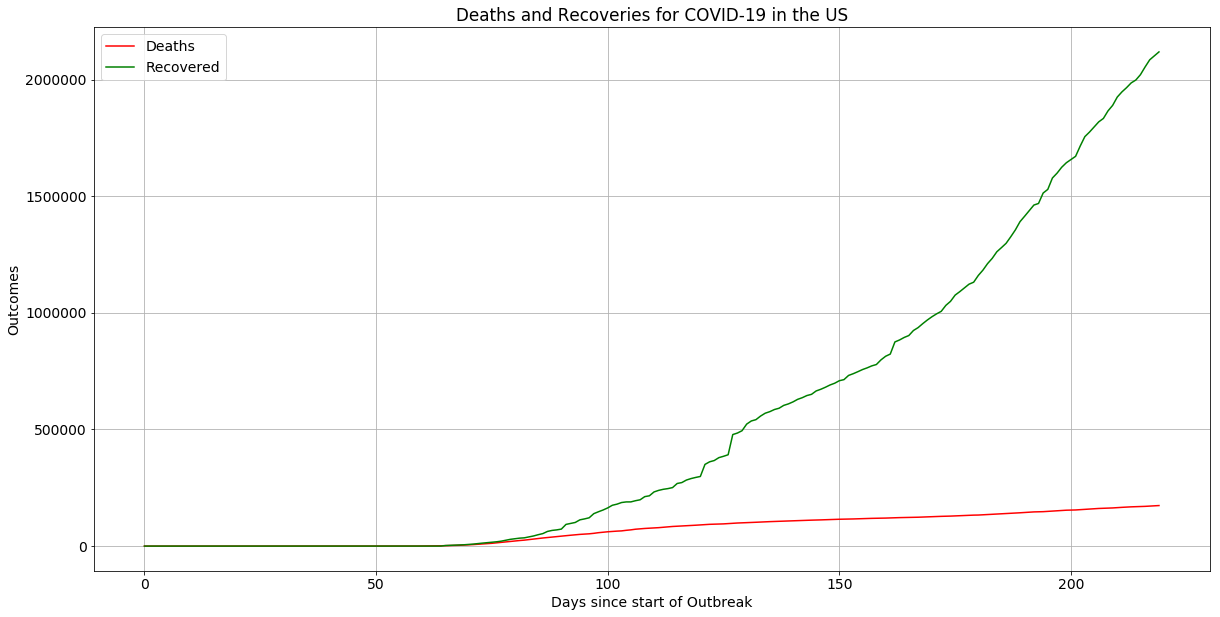

In [91]:
# Plot Deaths, Recoveries as a function of date nationally

# Create the variables
df_NWdeath = df_NATIONWIDE[['death']]
df_NWrecovered = df_NATIONWIDE[['recovered']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship for Deaths, Recoveries
plt.figure(figsize=(20,10))
plt.plot(df_NWDate, df_NWdeath, color ='red', label ='Deaths')
plt.plot(df_NWDate, df_NWrecovered,color='green', label = 'Recovered')

# Provide Title and Labels
plt.title('Deaths and Recoveries for COVID-19 in the US')
plt.ylabel('Outcomes')
plt.xlabel('Days since start of Outbreak')

# Corrent Font Size and add Legend
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.grid()
plt.show()

Now let's plot the current and cumulative ICU patent populations nationwide.

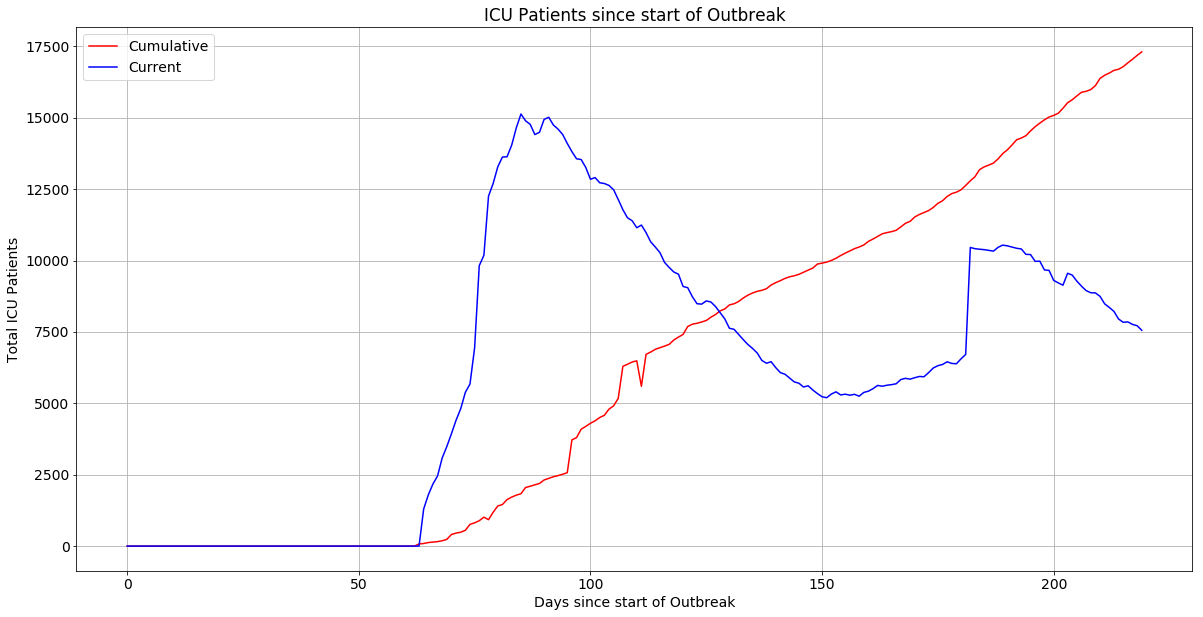

In [90]:
# Plot Cumulative, Current ICU Patient Populations as a function of date nationally

# Create the variables
df_NWinIcuCumulative = df_NATIONWIDE[['inIcuCumulative']]
df_NWinIcuCurrently = df_NATIONWIDE[['inIcuCurrently']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship for Cumulative, Current ICU Patients
plt.figure(figsize=(20,10))
plt.plot(df_NWDate, df_NWinIcuCumulative, color ='red', label ='Cumulative')
plt.plot(df_NWDate, df_NWinIcuCurrently,color='blue', label = 'Current')

# Provide Title and Labels
plt.title('ICU Patients since start of Outbreak')
plt.ylabel('Total ICU Patients')
plt.xlabel('Days since start of Outbreak')

# Corrent Font Size and add Legend
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.grid()
plt.show()

From this data, we can see a steady increase in the number of patients placed in the ICU over the lifetime of the pandemic. With regard to the daily current # of ICU patients, we see a local maximum around 90 days into the outbreak (approximately April 21, 2020), a local minimum around 150 days (approximately June 21, 2020), and another local maximum around 185 days (approximately July 25, 2020). These observations appear to make logical sense, as April 21, 2020 was well within the 'stay-at-home order' mandate timeframes. 

Now let us look at the number of cumulative and current hospitalizations.

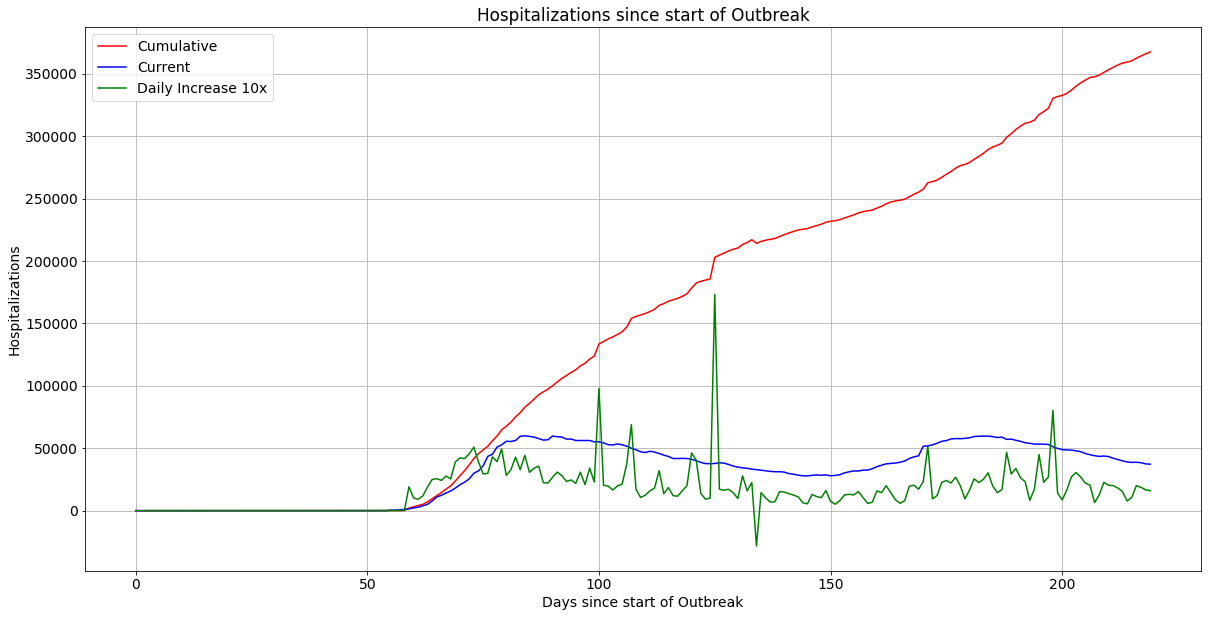

In [89]:
# Plot Cumulative, Current Hospitalizations as a function of date nationally

# Create the variables
df_NWhospitalizedCurrently = df_NATIONWIDE[['hospitalizedCurrently']]
df_NWhospitalizedCumulative = df_NATIONWIDE[['hospitalizedCumulative']]
df_NWhospitalizedIncrease = 10*df_NATIONWIDE[['hospitalizedIncrease']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship for Cumulative, Current and Increasing Hospitalizations
plt.figure(figsize=(20,10))
plt.plot(df_NWDate, df_NWhospitalizedCumulative, color ='red', label ='Cumulative')
plt.plot(df_NWDate, df_NWhospitalizedCurrently,color='blue', label = 'Current')
plt.plot(df_NWDate, df_NWhospitalizedIncrease,color='green', label = 'Daily Increase 10x')

# Provide Title and Labels
plt.title('Hospitalizations since start of Outbreak')
plt.ylabel('Hospitalizations')
plt.xlabel('Days since start of Outbreak')

# Corrent Font Size and add Legend
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.grid()
plt.show()

Here we can see that the first local maximum for current hospitalizations was about 75 days into the outbreak (approximately April 6, 2020) and a second about 175 days into the outbreak (approximately July 15, 2020). The trendlines for the daily increases appear to match these trends as well.

Let us create a final set of plots looking at those on ventilators.

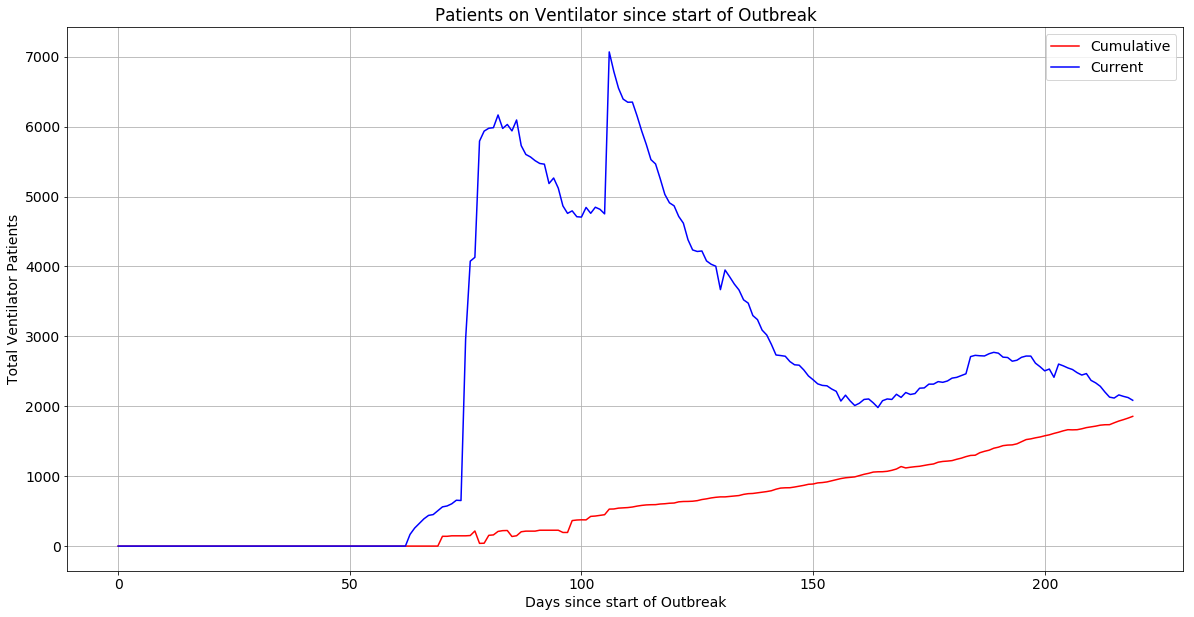

In [88]:
# Plot Cumulative, Current Ventilator Populations as a function of date nationally

# Create the variables
df_NWonVentilatorCumulative = df_NATIONWIDE[['onVentilatorCumulative']]
df_NWonVentilatorCurrently = df_NATIONWIDE[['onVentilatorCurrently']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship for Cumulative, Current ICU Patients
plt.figure(figsize=(20,10))
plt.plot(df_NWDate, df_NWonVentilatorCumulative, color ='red', label ='Cumulative')
plt.plot(df_NWDate, df_NWonVentilatorCurrently, color='blue', label = 'Current')

# Provide Title and Labels
plt.title('Patients on Ventilator since start of Outbreak')
plt.ylabel('Total Ventilator Patients')
plt.xlabel('Days since start of Outbreak')

# Corrent Font Size and add Legend
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.grid()
plt.show()

Here we notice a discrepancy in the data. Specifically, it makes little sense that the number of patients currently on a ventilator would surpass the cumulative number. This indicates a reporting problem with the data. Let us confirm this issue by taking the values at 100 days from the start of the outbreak.

In [80]:
# Number of Current, Cumulative Patients on Ventilators at ~100 days since beginning of outbreak
df_NATIONWIDE[['onVentilatorCurrently', 'onVentilatorCumulative']][98:102:1]

,onVentilatorCurrently,onVentilatorCumulative
98,4796.0,365.0
99,4712.0,373.0
100,4707.0,376.0
101,4845.0,375.0


Either the data is being defined in a way we do not understand or there is a discrepancy.

Next, let us look at the correlation between hospitalization, ICU admittance, ventilator use and death. We can use a similar setup to our previous heatmap.

Text(0.5, 1.0, 'Outcome Correlation Heatmap for COVID-19')

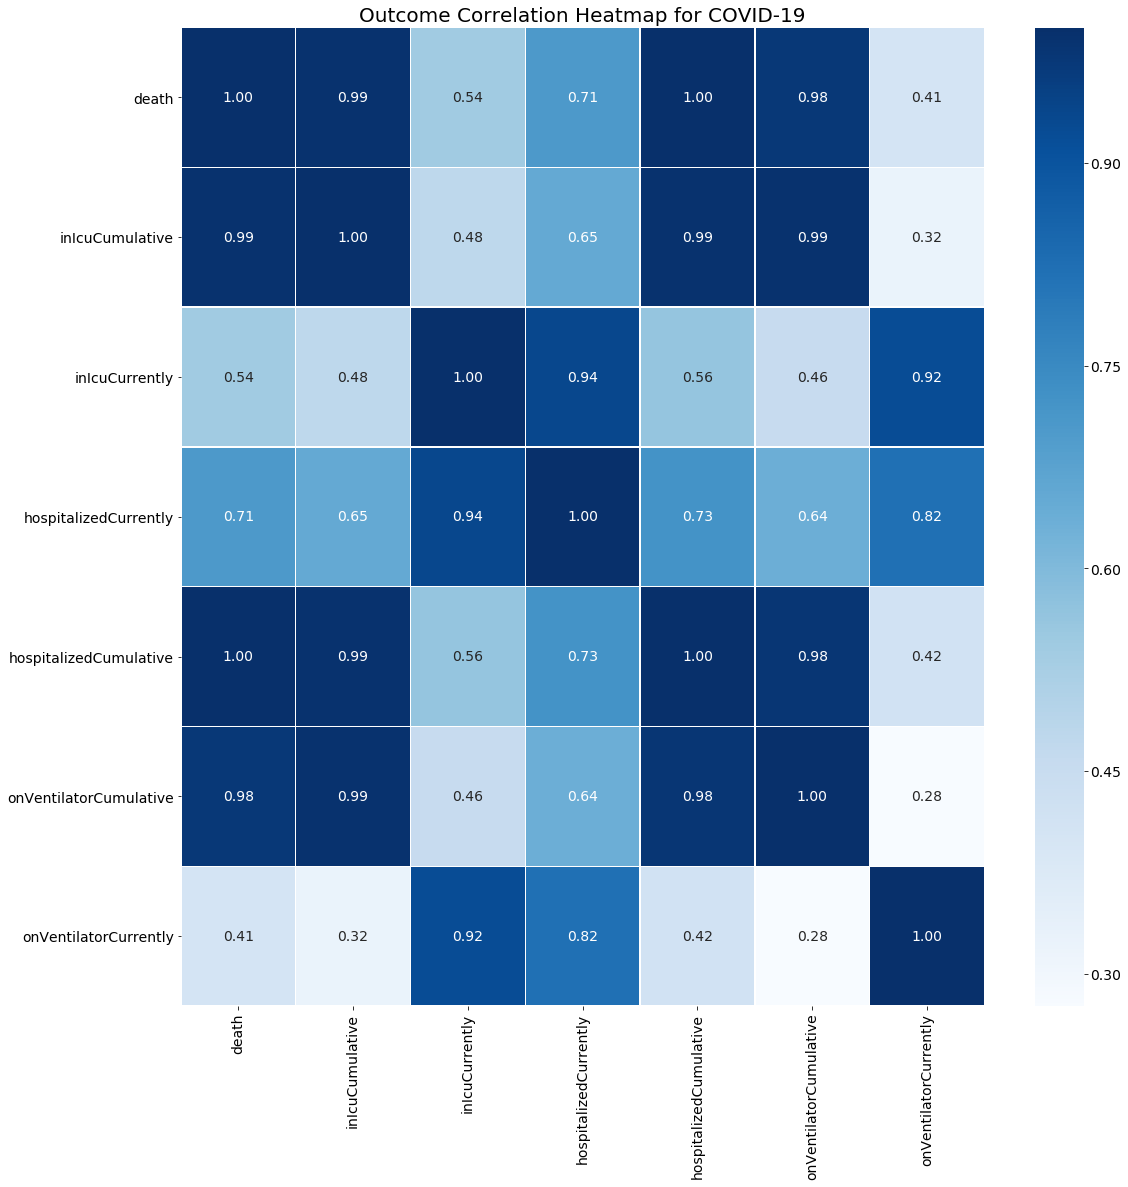

In [95]:
# Death/Hospitalization Outcome Matrix
# Select the features to do the analysis
df_NW_fs1 = df_NATIONWIDE[['death', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedCurrently', 'hospitalizedCumulative', 'onVentilatorCumulative', 'onVentilatorCurrently']]

# Death/Hospitalization Outcome Matrix
figureOutcome, axisOutcome = plt.subplots(figsize=(18, 18));
sns.heatmap(df_NW_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisOutcome, cmap="Blues");

plt.title('Outcome Correlation Heatmap for COVID-19', fontsize = 20)

This heatmap makes intuitive sense. If one is currently being treated, there should be a lower likelihood of a fatality due to possible improved outcomes over time. Interestingly enough, there is a lower correlation between being placed on a ventilator or placed in the ICU currently with death than being hospitalized. A possible hypothesis for this observation is that those being hospitalized may already have compromized immune systems, reducing their prognosis. 

Finally, let us look at the correlationb between positive tests, negative tests, hospitalizations and deaths.

Text(0.5, 1.0, 'Outcome Correlation Heatmap for COVID-19')

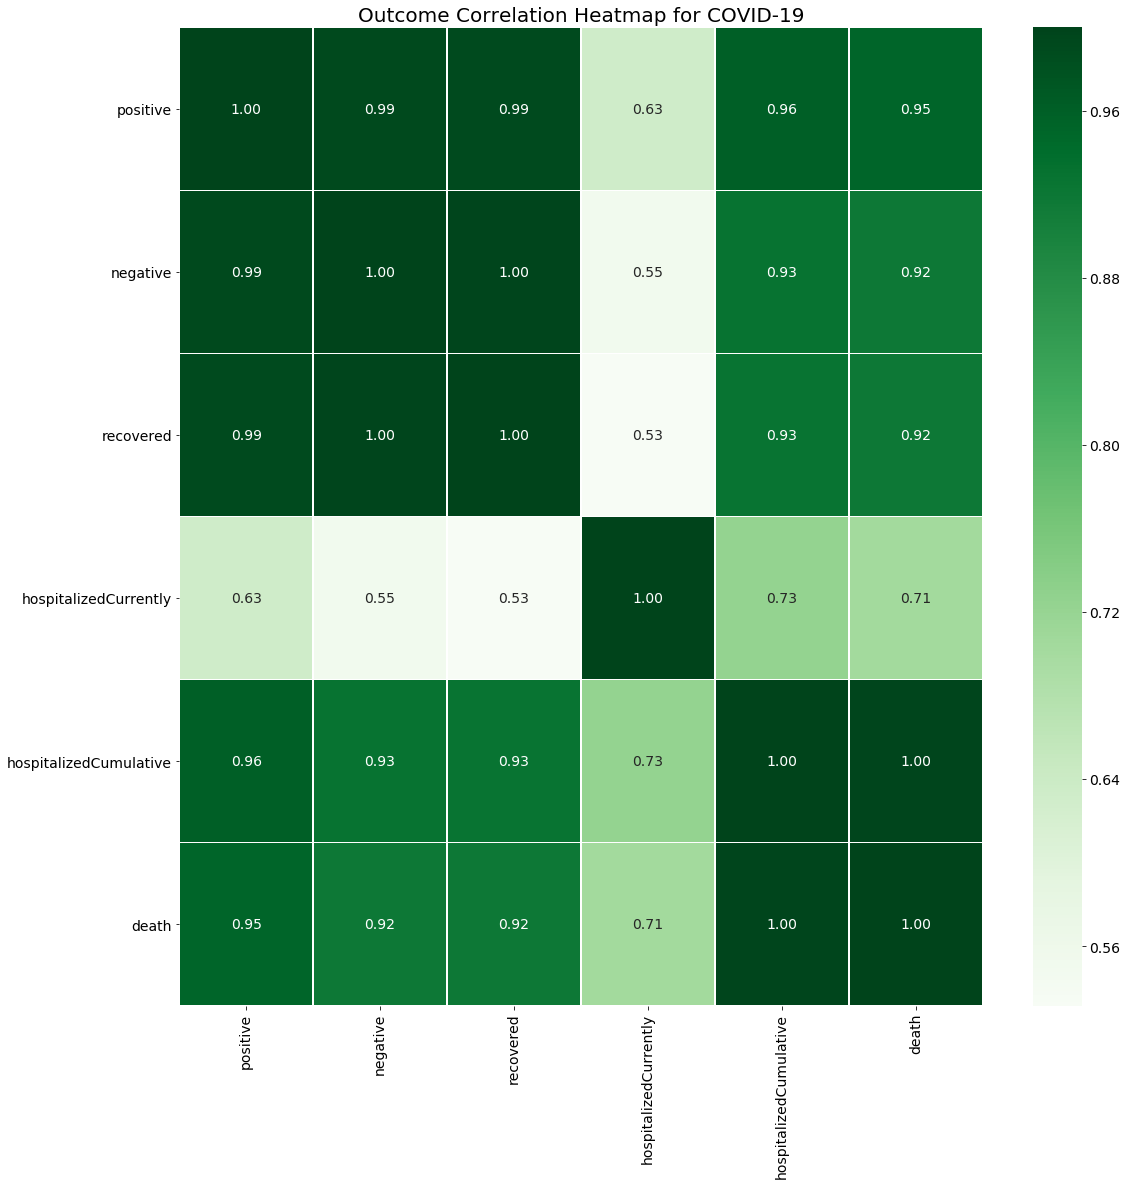

In [98]:
# Testing and Outcome Correlation Matrix
# Select the features to do the analysis
df_NW_fs2 = df_NATIONWIDE[['positive', 'negative', 'recovered', 'hospitalizedCurrently', 'hospitalizedCumulative', 'death']]

# Death/Hospitalization Outcome Matrix
figureOutcome, axisOutcome = plt.subplots(figsize=(18, 18));
sns.heatmap(df_NW_fs2.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisOutcome, cmap="Greens");

plt.title('Outcome Correlation Heatmap for COVID-19', fontsize = 20)

We see a strong correlation with (1) positive and death and (2) negative and recovered. Moreover we see weak correlations postive and hospitalized currently. The weak correlations would appear to suggest many people test positive and may not need to be hospitalized.

## Discussion

In this open-ended project, we were able to arrive at some interesting results:

<ul>
    <li>(1) Lower data quality scores (C, D, F) showed no correlation with death or hospitalization.</li>
    <li>(2) 16 out of 56 state/territorial jurisdiction have currently lower quality data scores.</li>
    <li>(3) Peak ICU occupancy occurred on ~ April 21 and ~ July 25; peak vacancy occured on ~ June 21.</li>
    <li>(4) Hospitalizations have peaked about two weeks earlier than ICU admittances.</li>
    <li>(5) Ventilator data is somewhat unreliable.</li>
    <li>(6) Hospitalizations have the strongest correlation with deaths as compared to ICU admittance or ventilator use.</li>
    <li>(7) Weak correlations between positive tests and current hospitalizations indicated many may not need hospitalizations (i.e. assymptomatic).</li>
</ul>


## Conclusion

The goal of this project was to explore any trends in the currently collected COVID-19 pandemic data using recently acquired data science skills. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!